# Chapter 5 - Resampling Methods  

The topics of this chapter are:

- The Validation Set Approach
- Cross-Validation
- The Bootstrap

Two packages are used in the examples of this chapter: ISLR and boot.

---
Once we have fitted a model using a set of observations we want to test its performance on new data. Three approaches are discussed in the book: validation set, cross validation and bootstrap. 

The validation set approach consists of splitting the available data set into two parts, the training set, used to fit our model, and the validation set, used to test the performance of our model. The problem of the validation set approach is that the model will have a lower performance than it could achieve if the full available data set could be used for training. 

Cross validation solves this problem by splitting the observations in k subsets, using one of them to test the model trained with the other k - 1 sets, repeating the procedure k times and taking the average error rate. The paramenter k can be small, 1, 5, 10 being the most used values, so that the problem raised by the validation set will not have impact. 

Bootstrap is a technique that can be used even with small data sets to estimate the accuracy of an estimate. it is similar to cross-validation, but the bootstrap samples are created by taking random observations with replacement from the available observations.     

### Standard error of the regression parameters
Any parameter that is used in a statistical model is distributed according to a probability distribution and it comes with an error. When we use a function in R to fit a model, such asd lm(), it returns the mean values of the parameters and the standard error associated with them. In the example we load a data set, fit a linear regression model of y on X1 and X2 and print the standard error for β1.

In [31]:
load("data/5.R.RData")
dim(Xy); names(Xy)

[1] 1000    3

[1] "X1" "X2" "y"

We fit a linear model using all the observations

In [46]:
fit <- lm(y ~ X1 + X2, data = Xy)
summary(fit)


Call:
lm(formula = y ~ X1 + X2, data = Xy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44171 -0.25468 -0.01736  0.33081  1.45860 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26583    0.01988  13.372  < 2e-16 ***
X1           0.14533    0.02593   5.604 2.71e-08 ***
X2           0.31337    0.02923  10.722  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5451 on 997 degrees of freedom
Multiple R-squared:  0.1171,	Adjusted R-squared:  0.1154 
F-statistic: 66.14 on 2 and 997 DF,  p-value: < 2.2e-16


The standard error for $\beta_1$ is 0.02593. We cannot trust the error because it is computed using the full data set and the summary cannot give us the error on new observations. We will see how to use the bootstrap method to compute the standard error of the fitting parameters.

### 5.3.1 The Validation Set Approach
The validation set approach is used to estimate the mean squared error (MSE)

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$$

where $y_i$ is an observation and $\hat{f}(x_i)$ is a prediction from the fit. The set of available observation is split into two subsets. One subset is used for training and the other subset, the validation set, is used to test the quality of the fit by computing the MSE on unseen data. In the equation n is the size of the validation set. The observations in each subset are taken randomly from the original set of observations. 

In this example we use a cleaned version of the Auto data set in which the rows (5) without a value for the 'horsepower' field have been removed because the function na.omit(Auto) doesn't seem to work within the Jupyter notebook (it does work in RStudio). 

In [8]:
library(ISLR)
Auto <- read.csv("data/Auto.csv")
summary(Auto); dim(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

[1] 392   9

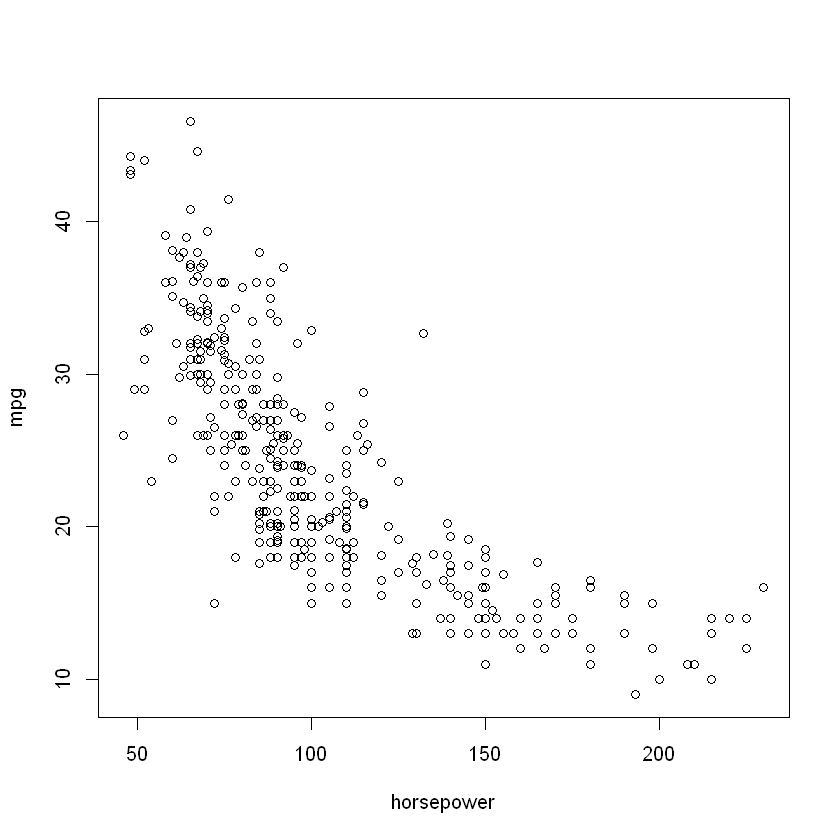

In [7]:
plot(Auto$horsepower, Auto$mpg, ylab="mpg", xlab="horsepower")

We fit a linear model using a random subset of observations, the training set, then we make predictions for the subset of observations that have not been used to compute the $\beta$ parameters, the validation set, and finally we compute the mean squared error on the validation set.

[1] 26.47694

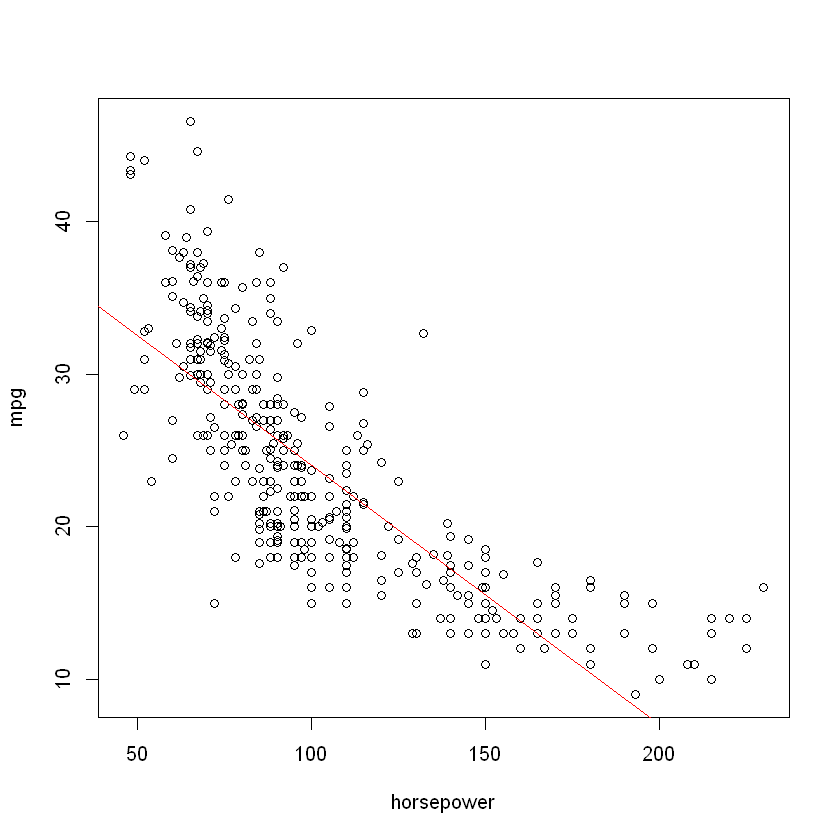

In [6]:
set.seed(1)
train <- sample(397, 196) # extract a random sample of integers as indexes of the records to be used for training
#Auto1.train <- Auto1[train,] # training set
#Auto1.val <- Auto1[-train,] # validation set
lm.fit <- lm(mpg ~ horsepower, data = Auto, subset = train) # fit the model using the train data
pred <- predict(lm.fit, Auto) # using the model make predictions for the unseen observation
squared_residuals <- (Auto$mpg - pred)^2 # compute the square of the residuals for the validation set
mse <- mean(squared_residuals[-train]) # compute the mean squared error on the validation set
mse # mean squared error on the validation set
plot(Auto$horsepower, Auto$mpg, ylab="mpg", xlab="horsepower")
abline(lm.fit, col = "red")

We try to improve the fit adding a term of the 2nd order for horsepower. We use I(horsepower^2) instead of poly(horsepower,2) as in the book because poly() returns an error.

In [24]:
lm.fit2 <- lm(mpg ~ horsepower + I(horsepower^2), data = Auto, subset = train) # fit the model using the train data
pred <- predict(lm.fit2, Auto) # using the model make predictions for the unseen observation
squared_residuals <- (Auto$mpg - pred)^2 # compute the square of the residuals for the validation set
mse <- mean(squared_residuals[-train]) # compute the mean squared error on the validation set
mse # mean squared error on the validation set

[1] 20.52558

We can see that the mean squared error on the test set with the polynomial fit is significantly lower that with the linear one. We can see also from the plot that indeed the 2nd order polynomial is a better fit of the data.

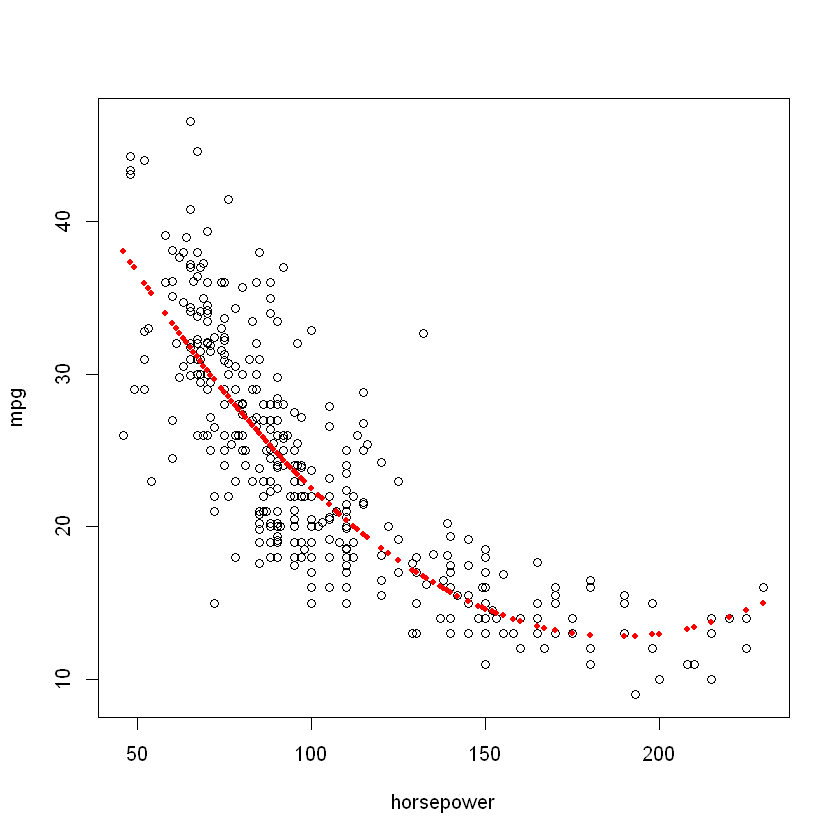

In [25]:
plot(Auto$horsepower, Auto$mpg, ylab="mpg", xlab="horsepower")
points(Auto$horsepower, pred, col ='red', pch=20) # plot the fit for each value of the predictor

### 5.3.2 Leave-One-Out Cross-Validation
We try to solve of the problem of the validation set approach, that part of the data cannot be used for training. The idea is to reduce the size of the validation set but resampling many of them from the observations and then computing the average mean squared error. The size of the smallest validation set is one so in the Auto data set, where we have 392 rows, we can create 393 validation set, compute the mean squared error for each of them and then take the mean value as the mean square error. In the following example we use this method to fit 5 polynomial models of the Auto data set to see at which order we can stop to have the best fit. As we will see a 2nd order polynomial provides the best fit with the lowest error.

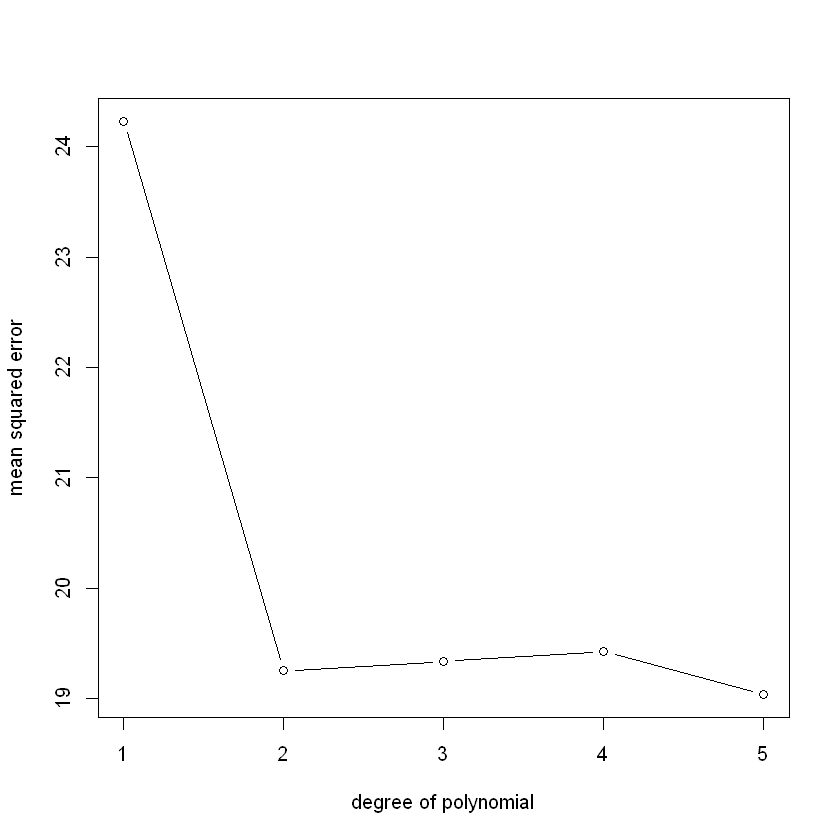

In [33]:
library(boot)
cv.error <- rep(0, 5)

for (i in 1:5) {
  glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto) # fit increasing higher order polynomials
  cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1] # computes the k-fold prediction error, default k = size of the data
}

plot(1:5, cv.error, type = "b", xlab = "degree of polynomial", ylab = "mean squared error" )

### 5.3.3 k-Fold Cross-Validation
This method is a generalization of the Leave-One-Out Cross-Validation method. We randomly split the data in K groups and use one for validation and the other K-1 for training. We fit the data and then we compute the prediction error. We repeat the procedure again K times using each time one of the split for validation and the rest for training.  

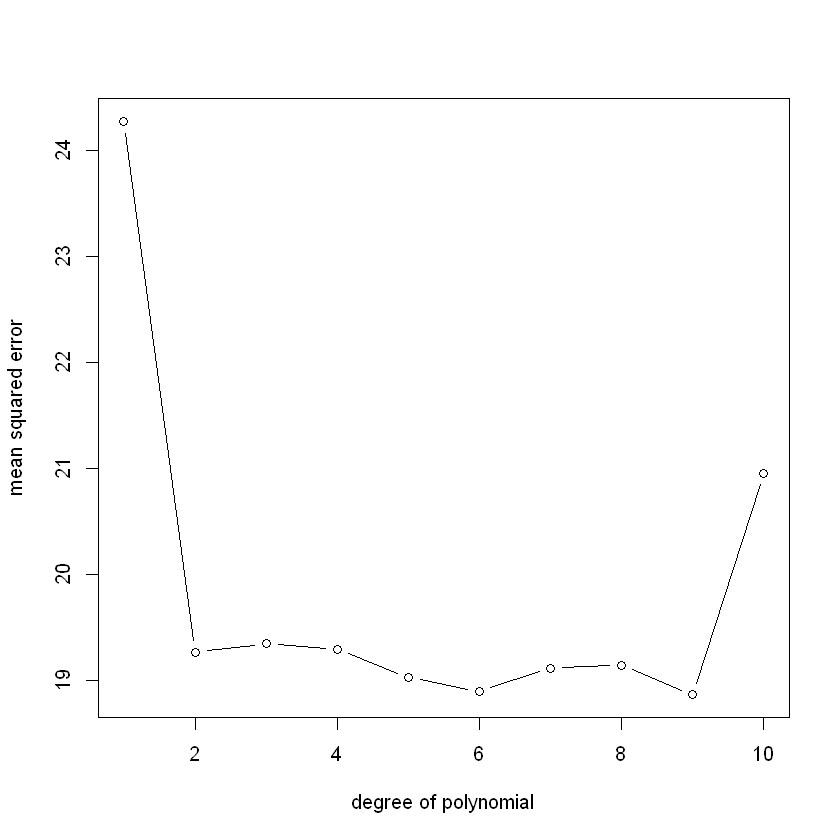

In [34]:
set.seed(17)
cv.error = rep(0, 10)
for (i in 1:10) {
  glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
  cv.error[i] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}

plot(1:10, cv.error, type = "b", xlab = "degree of polynomial", ylab = "mean squared error" )

### 5.3.4 The Bootstrap
The bootstrap is a technique to obtain samples from a given data set by taking random samples with replacement of the original data set. As an example we have two stocks, X and Y, for which we have the returns and we want to build a portfolio allocating our money in such a way that the variance of our portfolio, that represents the risk, is minimized

$$Var(\alpha X + (1 - \alpha) Y)$$

where

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}}$$

In order to compute a good estimation of $\sigma_X, \sigma_Y$ and $\sigma_{XY}$ and the accuracy of $\alpha$ we can use the bootstrap to create many samples of the original data set.

In [27]:
summary(Portfolio); dim(Portfolio)

       X                  Y           
 Min.   :-2.43276   Min.   :-2.72528  
 1st Qu.:-0.88847   1st Qu.:-0.88572  
 Median :-0.26889   Median :-0.22871  
 Mean   :-0.07713   Mean   :-0.09694  
 3rd Qu.: 0.55809   3rd Qu.: 0.80671  
 Max.   : 2.46034   Max.   : 2.56599  

[1] 100   2

We define the function $\alpha$ as a function that takes as imput the data, the stock returns, and a randomized index for that data.

In [28]:
alpha.fn <- function(data, index) {
    X <- data$X[index]
    Y <- data$Y[index]
    return ((var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X,Y)))
}

We use the boot() function from the 'boot' package to create random samples with replacement from the original data set and estimate the function $\alpha$ and its standard error.

In [29]:
set.seed(1)
boot(Portfolio, alpha.fn, R = 1000) # R is the number of bootstrap samples


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001596422  0.09376093

Going back to the example at the beginning of the chapter, we can compute again the $\beta$ parameters for the linear regression problem using the bootstrap method.

In [32]:
linear_fit <- function(data, index) {
    fit <- lm(y ~ X1 + X2, data = data, subset = index)
    coef(fit)
}

library(boot)
boot(Xy, linear_fit, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Xy, statistic = linear_fit, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.2658349 2.482855e-05  0.01435620
t2* 0.1453263 1.189974e-03  0.02839089
t3* 0.3133670 1.565310e-03  0.03514502

As we can see the standard error for the $\beta_1$ parameter computed with the bootstrap method is somewhat bigger than before because not all the observations are used to train the model, but it is not far from that. 